# Uvod


Naloga se ukvarja z analizo knjig na strani goodreads. Zajeti podatki so iz treh seznamov; Najboljše knjige 19., 20. oziroma 21. stoletja. Vključujejo naslov, avtorja in leto izdaje knjige. Zraven so tudi podatki, ki jih prispevajo uporabniki strani: žanri, med katere naj bi knjiga spadala, povprečna ocena, število ocen posamezne knjige in število kritik, ki jih bralci napišejo o njej. Drugo poglavje projektne naloge je posebej namenjeno analizi avtorjev, tretje pa žanrov.

# Osnovna analiza

Zajeti podatki so v dveh razpredelnicah; v eni so podatki o žanrih posamezne knjige, v drugi pa vse ostalo.

In [14]:
import pandas as pd
knjige = pd.read_csv('knjige.csv', index_col='id')
zanri = pd.read_csv('zanri.csv')
pd.options.display.max_rows = 20
%matplotlib notebook

Razpredelnici s knjigami je treba odstraniti duplikate:

In [15]:
knjige = knjige.drop_duplicates(keep='first')
knjige

,naslov,avtor_id,avtor,leto,ocena,st_ocen,st_kritik
id,,,,,,,
1885,Pride and Prejudice,1265,Jane Austen,1813,4.25,2465727,54575
10210,Jane Eyre,1036615,Charlotte Brontë,1847,4.11,1387282,34854
5297,The Picture of Dorian Gray,3565,Oscar Wilde,1890,4.07,779572,23090
6185,Wuthering Heights,4191,Emily Brontë,1847,3.84,1126057,29569
7144,Crime and Punishment,3137322,Fyodor Dostoyevsky,1866,4.20,510326,14616
35031085,Frankenstein,11139,Mary Wollstonecraft Shelley,1818,3.77,978542,24345
7126,The Count of Monte Cristo,4785,Alexandre Dumas,1844,4.23,658188,17669
24213,Alice's Adventures in Wonderland &amp; Through...,8164,Lewis Carroll,1872,4.07,412252,9217
17245,Dracula,6988,Bram Stoker,1897,3.98,779888,19981


Podatki so iz seznamov najboljših knjig 19., 20. in 21 stoletja, torej bi moralo biti število bralcev precejšnje. Gotovo je med njimi kakšna, ki si mesta ne zasluži.

In [16]:
slabe_knjige = knjige[(knjige.st_ocen < 20) & (knjige.st_kritik < 20)]
slabe_knjige.sort_values(by='st_ocen')

,naslov,avtor_id,avtor,leto,ocena,st_ocen,st_kritik
id,,,,,,,
17909028,The Caves: Book One - The Event,7027588,Melody Laughlin,2013,5.00,7,1
13432288,The Gathering (The damnation Chronicles: Book 3),1107101,Joseph Sweet,2011,4.89,9,0
21865943,Regular People of the Weak: A Rebel's Experien...,8128206,Shareef Mabrouk,2014,4.78,9,0
16123396,The Harbingers (The damnation Chronicles # 4),1107101,Joseph Sweet,2012,4.55,11,2
13432285,Redemption (The Damnation Chronicles: book 2),1107101,Joseph Sweet,2010,4.67,12,0
15992396,"Take a Deep Breath - 21 Top Tips for Relaxed, ...",6520851,Michal Siwiec,2012,4.00,12,0
24985876,The Code: The Assiduous Quest of Tobias Hopkin...,13528752,James Faro,2015,4.92,12,3
23681340,Politixworks,10347331,Chuck U. Farlie,2014,4.71,14,2
26809568,Valhalla (Colonization #4),5375385,Scott McElhaney,2015,4.53,15,0


Ime, ki najbolj izstopa, je Joseph Sweet. Po krajši raziskavi se izkaže, da gre za avtorja, izdanega v samozaložbi, ki sam napiše večino svojih kritik. Njegovo mesto med "Najbolj priljubljenimi knjigami 21. stoletja" je tako vsekakor zelo sumljivo.

Poglejmo, kakšna je povprečna ocena vseh knjig (z drugimi besedami, kako prizanesljivi so uporabniki pri ocenjevanju), ter deset najslabše in najboljše ocenjenih knjig, pri čemer upoštevamo samo tiste, ki so prejele dovolj glasov.

In [71]:
knjige.ocena.mean().round(2)

4.01

In [18]:
najboljše = knjige[(knjige.st_ocen > 10000) & (knjige.st_kritik > 5000)].sort_values(by='ocena', ascending=False)
najslabše = knjige[(knjige.st_ocen > 10000) & (knjige.st_kritik > 5000)].sort_values(by='ocena')
najboljše[:10]

,naslov,avtor_id,avtor,leto,ocena,st_ocen,st_kritik
id,,,,,,,
17332218,"Words of Radiance (The Stormlight Archive, #2)",38550,Brandon Sanderson,2014,4.77,142520,9129
862041,"Harry Potter Series Box Set (Harry Potter, #1-7)",1077326,J.K. Rowling,2007,4.74,222730,6869
17927395,A Court of Mist and Fury (A Court of Thorns an...,3433047,Sarah J. Maas,2016,4.69,199168,29384
7235533,"The Way of Kings (The Stormlight Archive, #1)",38550,Brandon Sanderson,2010,4.65,210744,14019
136251,Harry Potter and the Deathly Hallows (Harry Po...,1077326,J.K. Rowling,2007,4.62,2078115,57026
22299763,"Crooked Kingdom (Six of Crows, #2)",4575289,Leigh Bardugo,2016,4.62,97807,15657
18006496,"Queen of Shadows (Throne of Glass, #4)",3433047,Sarah J. Maas,2015,4.59,157774,17310
18335634,"Clockwork Princess (The Infernal Devices, #3)",150038,Cassandra Clare,2013,4.59,278381,25450
1215032,"The Wise Man's Fear (The Kingkiller Chronicle,...",108424,Patrick Rothfuss,2011,4.58,335098,18077


Prav vse najbolje ocenjene knjige so napisane nedavno, kar seveda ni presenetljivo.

In [19]:
najslabše[:10]

,naslov,avtor_id,avtor,leto,ocena,st_ocen,st_kritik
id,,,,,,,
4929705,A Reliable Wife,266461,Robert Goolrick,2009,3.26,70900,9788
13497818,The Casual Vacancy,1077326,J.K. Rowling,2012,3.29,275094,30060
24817626,"Go Set a Watchman (To Kill a Mockingbird, #2)",1825,Harper Lee,2015,3.31,192026,26760
8573020,The Weird Sisters,571131,Eleanor Brown,2011,3.36,41812,6180
12296,The Scarlet Letter,7799,Nathaniel Hawthorne,1850,3.38,614789,12725
8366402,The Tiger's Wife,4937879,Téa Obreht,2011,3.38,79790,10011
228333,"The Nanny Diaries (Nanny, #1)",9222,Emma McLaughlin,2002,3.41,342272,5249
4900,Heart of Darkness,3345,Joseph Conrad,1899,3.42,346162,11147
10964693,The Marriage Plot,1467,Jeffrey Eugenides,2011,3.43,104932,11038


Tu so rezultati precej zanimivi. J. K. Rowling ima poleg najvišjih tudi enega od najnižjih rezultatov s svojo prvo knjigo, ki ni iz serije o Harryju Potterju. Prav to je najbrž razlog, da je uvrščena tako nizko. Na seznamu najdemo tudi Go Set a Watchman, ki jo je Harper Lee napisala pod pritiskom svoje založbe in je bila kritično zelo slabo sprejeta, in pa The Scarlet Letter, ki je pogosto obvezno branje v angleško govorečem svetu.

Glede na to, da so zajeti seznami knjig 19., 20. in 21. stoletja, nas seveda zanima, katero stoletje je med bralci najbolj priljubljeno:

In [70]:
knjige['stoletje'] = 100 * (knjige.leto // 100)
knjige.groupby('stoletje').ocena.mean().round(2)

stoletje
1700    4.11
1800    3.90
1900    4.05
2000    4.01
Name: ocena, dtype: float64

Opazimo, da je na seznamu tudi kakšna knjiga, ki vanj ne spada, saj se 18. stoletje na bi smelo pojaviti. Očitno se je bralcem najbolj zamerilo 19. stoletje.

# Analiza avtorjev

Kateri avtorji so najbolj priljubljeni mad bralci?

In [77]:
najboljši = knjige[knjige.st_ocen > 10000].groupby(['avtor_id', 'avtor']).ocena.mean()
najboljši.sort_values(ascending=False)[:20]

avtor_id  avtor            
13778     Bill Watterson       4.683333
108424    Patrick Rothfuss     4.565000
15049422  Angie Thomas         4.560000
6492      Francine Rivers      4.553333
7816      Fernando Pessoa      4.480000
28709     Chuck Dixon          4.480000
5158478   Anonymous            4.480000
3433047   Sarah J. Maas        4.472500
500       Jorge Luis Borges    4.472500
5804101   Anthony Ryan         4.460000
1943477   Kathryn Stockett     4.460000
20411     Lawrence Hill        4.450000
4859212   R.J. Palacio         4.450000
38550     Brandon Sanderson    4.442857
24824     Jon Stone            4.440000
722       Robert A. Caro       4.430000
17434     Alex Haley           4.430000
12425     Robert Kirkman       4.430000
785914    Barbara Demick       4.430000
5117      Art Spiegelman       4.420000
Name: ocena, dtype: float64

Zdaj pa nas zanimajo najbolj kontroverzni avtorji, torej tisti z veliko kritikami, ki imajo najnižje ocene.

In [78]:
kontroverzni= knjige[knjige.st_kritik > 25000].groupby(['avtor_id', 'avtor']).ocena.mean()
kontroverzni.sort_values()[:20]

avtor_id  avtor             
11679     Elizabeth Gilbert     3.530000
306       William Golding       3.660000
941441    Stephenie Meyer       3.664000
1304470   Ally Condie           3.670000
5042201   John Tiffany          3.700000
15481463  William Paul Young    3.750000
316       Alice Sebold          3.790000
4725841   E.L. James            3.796667
630       Dan Brown             3.797500
819789    J.D. Salinger         3.800000
4280      Kazuo Ishiguro        3.810000
173491    E. Lockhart           3.840000
4191      Emily Brontë          3.840000
566       Paulo Coelho          3.840000
383606    Robert Galbraith      3.850000
585       John Steinbeck        3.850000
1050      Mark Haddon           3.860000
811       Yann Martel           3.890000
8719      Donna Tartt           3.890000
3046613   Ransom Riggs          3.900000
Name: ocena, dtype: float64

Očitno so parametri precej ustrezno izbrani glede na pojavitev Stephenie Meyer (Somrak), E. L. James (50 odtenkov sive) in Dana Browna (Da Vincijeva šifra).

Nekateri avtorji imajo na strani po več knjig. Ali količina pomeni tudi kakovost?

In [116]:
produktivnost_avtorjev = knjige.groupby(['avtor_id', 'avtor']).size().to_frame('st_knjig')
ocene_po_avtorjih = zdruzen.groupby(['avtor_id', 'avtor']).ocena.mean().round(2)
produktivni_avtorji = pd.concat([ocene_po_avtorjih, produktivnost_avtorjev], axis=1).sort_values('st_knjig', ascending=False)
produktivni_avtorji

,,ocena,st_knjig
avtor_id,avtor,,
3389,Stephen King,4.02,40
4624490,Edgar Allan Poe,4.00,23
1654,Terry Pratchett,4.24,21
3137322,Fyodor Dostoyevsky,4.02,18
1069006,C.S. Lewis,4.09,17
20524,Anthony Trollope,3.97,17
15872,Rick Riordan,4.34,16
1221698,Neil Gaiman,4.14,15
239579,Charles Dickens,3.86,15


<IPython.core.display.Javascript object>


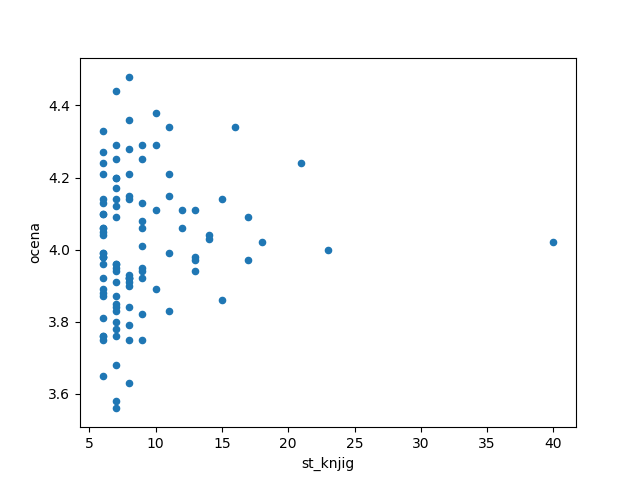

In [103]:
produktivni_avtorji[produktivni_avtorji.st_knjig > 5].plot.scatter('st_knjig', 'ocena')

Zdi se torej, da zelo hitro pišejo bolj povprečni avtorji. Izstopata pa Rick Riordan pri šestnajstih in Terry Pratchett pri enaindvajsetih knjigah.

# Žanri

Razpredelnica žanri vsebuje precej žanrov na posamezno knjigo, veliko se jih tako pojavi samo nekajkrat:

Prikažimo nekaj najbolj pogostih žanrov z grafom.

In [21]:
popularnost_žanrov = zanri.stack().value_counts()

<IPython.core.display.Javascript object>


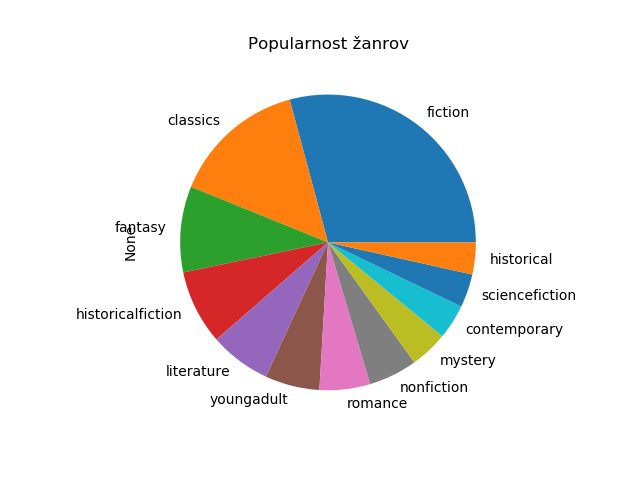

In [117]:
popularnost_žanrov[popularnost_žanrov > 300].plot(kind='pie', title='Popularnost žanrov', fontsize = '10')

Iz grafa se da razbrati predvsem, da pridobljeni žanri niso najbolj natančni; ne vemo na primer, v čem točno se razlikujeta "historicalfiction" in "historical", ali pa "literature" in "fiction". Vseeno je analiza žanrov lahko zanimiva, če se le zavedamo omejitev. Velika večina obravnavanih knjig seveda spada med leposlovje. 

Združimo tabeli za žanri in ostalimi podatki o knjigah, da bomo lahko pogledali podatke glede na posamezen žanr.

In [23]:
zdruzen = pd.merge(zanri, knjige, right_on = 'id', left_on = 'knjiga')
zdruzen

,knjiga,zanr,naslov,avtor_id,avtor,leto,ocena,st_ocen,st_kritik
0,1885,classics,Pride and Prejudice,1265,Jane Austen,1813,4.25,2465727,54575
1,1885,fiction,Pride and Prejudice,1265,Jane Austen,1813,4.25,2465727,54575
2,1885,romance,Pride and Prejudice,1265,Jane Austen,1813,4.25,2465727,54575
3,10210,classics,Jane Eyre,1036615,Charlotte Brontë,1847,4.11,1387282,34854
4,10210,fiction,Jane Eyre,1036615,Charlotte Brontë,1847,4.11,1387282,34854
5,10210,romance,Jane Eyre,1036615,Charlotte Brontë,1847,4.11,1387282,34854
6,10210,historicalfiction,Jane Eyre,1036615,Charlotte Brontë,1847,4.11,1387282,34854
7,10210,literature,Jane Eyre,1036615,Charlotte Brontë,1847,4.11,1387282,34854
8,10210,gothic,Jane Eyre,1036615,Charlotte Brontë,1847,4.11,1387282,34854
9,10210,historical,Jane Eyre,1036615,Charlotte Brontë,1847,4.11,1387282,34854


Kakšne so povprečne ocene po žanrih, ki se pojavijo dovolj pogosto?

In [105]:
pogostost_zanrov = zanri.groupby('zanr').size().to_frame('pogostost')
ocene_po_zanrih = zdruzen.groupby('zanr').ocena.mean()
povprecna_na_zanr = pd.concat([ocene_po_zanrih, pogostost_zanrov], axis=1).sort_values('pogostost', ascending= False)
povprecna_na_zanr

,ocena,pogostost
zanr,,
fiction,3.982066,2604
classics,3.986161,1311
fantasy,4.077440,838
historicalfiction,4.001708,726
literature,3.945661,599
youngadult,4.049336,532
romance,4.020565,494
nonfiction,4.073432,475
mystery,3.975849,369


Narišimo graf žanrov z najboljšimi ocenami, seveda le, če se žanri dovolj pogosto pojavijo.

<IPython.core.display.Javascript object>


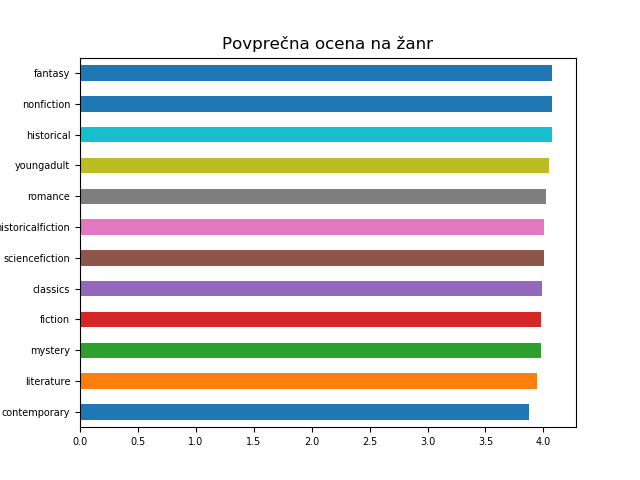

In [106]:
ocena_zanra = povprecna_na_zanr.sort_values('ocena')
ocena_zanra[ocena_zanra.pogostost > 300].ocena.plot(kind='barh', title='Povprečna ocena na žanr', fontsize='7')

Graf ni preveč zgovoren, vse povprečne ocene se gibljejo nekje okoli 4. Pričakovano je najbolje ocenjen žanr "fantasy": skoraj vse najbolje ocenjene knjige iz osnovne analize so bile iz tega žanra.

Morda bi bilo zanimivo tudi pogledati, kateri žanri privabijo največ participacije v obliki kritik.

In [107]:
kritike_po_zanrih = zdruzen.groupby('zanr').st_kritik.mean()
kritike_na_zanr = pd.concat([kritike_po_zanrih, pogostost_zanrov], axis=1).sort_values('pogostost', ascending= False)
kritike_na_zanr

,st_kritik,pogostost
zanr,,
fiction,5986.503049,2604
classics,4083.128475,1311
fantasy,7971.583333,838
historicalfiction,5861.486339,726
literature,4526.712887,599
youngadult,13344.479705,532
romance,9324.620968,494
nonfiction,3794.909474,475
mystery,6103.140162,369


<IPython.core.display.Javascript object>


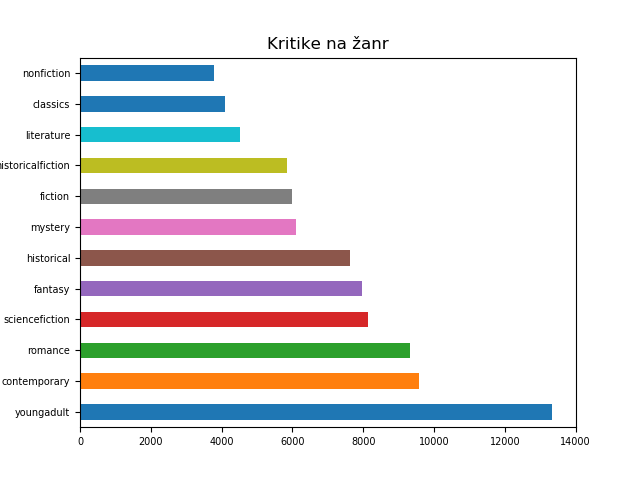

In [108]:
kritike_zanra = kritike_na_zanr.sort_values(by='st_kritik', ascending=False)
kritike_zanra[kritike_zanra.pogostost > 300].st_kritik.plot(kind='barh', title='Kritike na žanr', fontsize ='7')

Tu pa zelo očitno izstopa "youngadult". Verjetno je na mestu zaključek, da je ime žanra tudi oznaka za najpogostejšo demografsko skupino uporabikov strani.

Za konec pa si še oglejmo, kako se povprečna ocena in število kritik žanra "school" primerjata z ostalimi.

In [114]:
(povprecna_na_zanr[povprecna_na_zanr.pogostost > 100].ocena.mean().round(2),
 kritike_na_zanr[kritike_na_zanr.pogostost > 100].st_kritik.mean().round(0))

(4.01, 5720.0)

In [115]:
ocene_po_zanrih['school'].round(2), kritike_po_zanrih['school'].round(0)

(3.82, 18072.0)

Rezultat vsekakor sugerira, da obvezno branje ni najbolj priljubljena aktivnost, da pa vseeno porodi mnogo razpravljanja.